## q1 a 表2预处理

In [98]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm

In [99]:
b2_data = pd.read_excel('..' + r'\竞赛发布数据\表2-患者影像信息血肿及水肿的体积及位置.xlsx', dtype = str)
b2_data

,ID,首次检查流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,20161212002136,69714,0.0002581977794991,0.8771122012795134,0.12014803339357948,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,20160406002131,47500,0.496,0.18077894736842104,0.3023157894736842,0,0,0.00303157894736842,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,20160413000006,86396,0.05371776471132923,0.8290777350803278,0.09968054076577619,0.00019676836890597,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,20161215001667,45498,0.00224185678491362,0.00219789880873885,0.02910018022770232,0.0003736427974856,0,0.16345773440590794,0.3136181810189459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,20161222000978,14832,0,0,0.00114617044228695,0.00033710895361381,0,0.00020226537216828,0.41336299892125133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,20200306000927,32559,0,0.03375410792714764,0,0,0,0.03854540987131055,0.9220492029853496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,20201009003102,18150,0,0,0,0,0,0,0.9974104683195593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,20200410001952,27969,0.00268154027673496,0.9373592191354714,0.05995924058779363,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,20200218000582,53154,0,0,0,0,0,0.00457162207924145,0.8576776912367837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
tmp_columns = ['流水号'] + b2_data.columns[2:24].to_list()
tmp_columns

['流水号',
 'HM_volume',
 'HM_ACA_R_Ratio',
 'HM_MCA_R_Ratio',
 'HM_PCA_R_Ratio',
 'HM_Pons_Medulla_R_Ratio',
 'HM_Cerebellum_R_Ratio',
 'HM_ACA_L_Ratio',
 'HM_MCA_L_Ratio',
 'HM_PCA_L_Ratio',
 'HM_Pons_Medulla_L_Ratio',
 'HM_Cerebellum_L_Ratio',
 'ED_volume',
 'ED_ACA_R_Ratio',
 'ED_MCA_R_Ratio',
 'ED_PCA_R_Ratio',
 'ED_Pons_Medulla_R_Ratio',
 'ED_Cerebellum_R_Ratio',
 'ED_ACA_L_Ratio',
 'ED_MCA_L_Ratio',
 'ED_PCA_L_Ratio',
 'ED_Pons_Medulla_L_Ratio',
 'ED_Cerebellum_L_Ratio']

In [101]:
follow_up_columns = b2_data.columns
follow_up_columns = ['随访' in x for x in follow_up_columns]
follow_up_columns = b2_data.columns[follow_up_columns].to_list()
follow_up_property_columns = [b2_data.columns.tolist().index(x) for x in follow_up_columns]
follow_up_property_columns.append(len(b2_data.columns))
tmp = [1]
tmp.extend(follow_up_property_columns)
follow_up_property_columns = tmp

new_b2_data = pd.DataFrame()
for i_row in tqdm(range(len(b2_data))):
    for i_col in range(len(follow_up_property_columns) - 1):
        tmp_df = b2_data.iloc[i_row, follow_up_property_columns[i_col]:follow_up_property_columns[i_col + 1]]
        tmp_df = pd.DataFrame(tmp_df).T
        tmp_df.columns = tmp_columns
        tmp_df['ID'] = b2_data.loc[i_row, 'ID']
        
        if re.sub('\D', '', b2_data.columns[follow_up_property_columns[i_col]]):
            tmp_follow_up_count = re.sub('\D', '', b2_data.columns[follow_up_property_columns[i_col]])
        else:
            tmp_follow_up_count = 0
        
        tmp_df['follow_up_count'] = str(tmp_follow_up_count)
        
        if new_b2_data.empty:
            new_b2_data = tmp_df
        else:
            new_b2_data = pd.concat([new_b2_data, tmp_df], axis = 0)

new_b2_data = new_b2_data[new_b2_data.columns.tolist()[-2:] + new_b2_data.columns.tolist()[:-2]]
new_b2_data = new_b2_data.dropna()
new_b2_data

  0%|          | 0/160 [00:00<?, ?it/s]

100%|██████████| 160/160 [00:05<00:00, 30.40it/s]


,ID,follow_up_count,流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,...,ED_ACA_R_Ratio,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio
0,sub001,0,20161212002136,69714,0.0002581977794991,0.8771122012795134,0.12014803339357948,0,0,0,...,0.10883296878513461,0.7262413377215396,0.13651137594799567,0,0,0,0,0,0,0
0,sub001,1,20161213000009,74902,0.0003604710154602,0.869683052521962,0.1260179968492163,0,0,0,...,0.09955438875263395,0.7829976855849943,0.0934056444091333,0.00025907630660817,0,0,0,0,0,0
0,sub001,2,20161218000100,70952,0.00155034389446386,0.8170594204532642,0.16571766828278273,0,0,0,...,0.14405421605685836,0.6817987204423404,0.14960793668269173,0.00528459759991192,0,0,0,0,0,0
0,sub001,3,20161223001020,62831,0.00466330314653595,0.803504639429581,0.17715777243717273,4.77471311932e-05,0,0,...,0.20822316848032804,0.5989999350607182,0.14189233067082277,0.01557615058491739,0,0,0,0,0,0
0,sub001,4,20161230000574,44029,0.0003406845488201,0.8355629244361671,0.15478434668059687,0,0,0,...,0.16656394696502788,0.6691714470835506,0.1270089603185891,0.0152025158425386,0,0,0,1.580303102135e-05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,sub158,3,20200423000871,3647,0,0.9574993145050726,0.04250068549492734,0,0,0,...,0.0515231231418209,0.8209766044549601,0.10293728499603069,0.00163441931416652,0,0,0,0,0,0
158,sub159,0,20200218000582,53154,0,0,0,0,0,0.00457162207924145,...,0,0,0,0,0,0.14767844767844768,0.7110187110187111,0.12474012474012475,0.00824670824670825,0
158,sub159,1,20200219000588,126642,0.0049667566841964,0.00017371803982881,0.00377441922900775,0,0,0.08603780736248638,...,0.00331247699668752,0.00173510699826489,0.02276670697723329,0.00515274199484726,0,0.2781954887218045,0.2863452337136548,0.24060150375939848,0.0250276039749724,0
159,sub160,0,20200821002584,49019,0,0.907505253065138,0.09237234541708317,0,0,0,...,0.23198367522285468,0.6799484480721727,0.0663731070776501,0,0,0,0,0,0,0


In [102]:
new_b2_data.to_csv(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + r'\竞赛发布数据\表2-long.csv', encoding='utf_8_sig')

## 计算其血肿扩张程度

In [103]:
new_b2_data = pd.read_csv(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\表2-long.csv', dtype = str)
new_b2_data['HM_volume'] = [float(x) for x in new_b2_data['HM_volume']]

In [104]:
import datetime

In [105]:
new_b2_data = new_b2_data[['ID', 'follow_up_count', '流水号', 'HM_volume']].copy()
new_b2_data['HM_volume'] = [float(x) for x in new_b2_data['HM_volume']]
new_b2_data

,ID,follow_up_count,流水号,HM_volume
0,sub001,0,20161212002136,69714.0
1,sub001,1,20161213000009,74902.0
2,sub001,2,20161218000100,70952.0
3,sub001,3,20161223001020,62831.0
4,sub001,4,20161230000574,44029.0
...,...,...,...,...
588,sub158,3,20200423000871,3647.0
589,sub159,0,20200218000582,53154.0
590,sub159,1,20200219000588,126642.0
591,sub160,0,20200821002584,49019.0


In [106]:
## 根据ID，连接其发病时间
b1_data = pd.read_excel(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\表1-患者列表及临床信息.xlsx', dtype = str)
b1_data = b1_data[['Unnamed: 0', '发病到首次影像检查时间间隔']]
b1_data.columns = ['ID', '发病到首次影像检查时间间隔']
b1_data['发病到首次影像检查时间间隔'] = [float(x) for x in b1_data['发病到首次影像检查时间间隔']]
b1_data

,ID,发病到首次影像检查时间间隔
0,sub001,2.5
1,sub002,3.0
2,sub003,2.0
3,sub004,1.0
4,sub005,5.0
...,...,...
155,sub156,5.5
156,sub157,0.5
157,sub158,2.8
158,sub159,3.0


In [107]:
new_b2_data = pd.merge(new_b2_data, b1_data, left_on = "ID", right_on = "ID", how = "left")
new_b2_data

,ID,follow_up_count,流水号,HM_volume,发病到首次影像检查时间间隔
0,sub001,0,20161212002136,69714.0,2.5
1,sub001,1,20161213000009,74902.0,2.5
2,sub001,2,20161218000100,70952.0,2.5
3,sub001,3,20161223001020,62831.0,2.5
4,sub001,4,20161230000574,44029.0,2.5
...,...,...,...,...,...
588,sub158,3,20200423000871,3647.0,2.8
589,sub159,0,20200218000582,53154.0,3.0
590,sub159,1,20200219000588,126642.0,3.0
591,sub160,0,20200821002584,49019.0,4.0


In [108]:
## 根据流水号，链接其流水号发生时间
fb1_data = pd.read_csv(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\附表1-long.csv', dtype = str)
tmp1, tmp2 = fb1_data[['sub_code', '入院首次检查流水号', '入院首次检查时间点']].copy(), fb1_data[['sub_code', '流水号', '时间点']].copy()
tmp1.columns = ['ID', '流水号', '时间点']
tmp2.columns = ['ID', '流水号', '时间点']
fb1_data = pd.concat([tmp1, tmp2], axis = 0)
fb1_data = fb1_data.drop_duplicates()
fb1_data

,ID,流水号,时间点
0,sub001,20161212002136,2016-12-12 23:32:54
4,sub002,20160406002131,2016-04-06 21:21:03
8,sub003,20160413000006,2016-04-13 01:18:17
10,sub004,20161215001667,2016-12-15 22:53:41
13,sub005,20161222000978,2016-12-22 13:18:48
...,...,...,...
492,sub158,20200411000244,2020-04-11 09:15:00
493,sub158,20200413001806,2020-04-13 14:10:00
494,sub158,20200423000871,2020-04-23 11:31:00
495,sub159,20200219000588,2020-02-19 15:01:00


In [109]:
new_b2_data = pd.merge(new_b2_data, fb1_data, left_on = ["ID", "流水号"], right_on = ["ID", "流水号"], how = "left")
new_b2_data['时间点'] = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ) for x in new_b2_data['时间点']]
new_b2_data

,ID,follow_up_count,流水号,HM_volume,发病到首次影像检查时间间隔,时间点
0,sub001,0,20161212002136,69714.0,2.5,2016-12-12 23:32:54
1,sub001,1,20161213000009,74902.0,2.5,2016-12-13 05:19:00
2,sub001,2,20161218000100,70952.0,2.5,2016-12-18 09:09:24
3,sub001,3,20161223001020,62831.0,2.5,2016-12-23 16:47:09
4,sub001,4,20161230000574,44029.0,2.5,2016-12-30 14:35:12
...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647.0,2.8,2020-04-23 11:31:00
589,sub159,0,20200218000582,53154.0,3.0,2020-02-18 15:29:00
590,sub159,1,20200219000588,126642.0,3.0,2020-02-19 15:01:00
591,sub160,0,20200821002584,49019.0,4.0,2020-08-21 22:32:00


In [110]:
new_b2_data['first_examination'] = 0
for i_row in tqdm(range(len(new_b2_data))):
    tmp_id = new_b2_data.loc[i_row, 'ID']
    tmp_df = new_b2_data[new_b2_data['ID'] == tmp_id]
    tmp_df = tmp_df[tmp_df['follow_up_count'] == '0']['时间点'].values[0]
    
    new_b2_data.loc[i_row, 'first_examination'] = pd.Timestamp(tmp_df)        ## 这里的tmp_df为时间的值
    
new_b2_data

100%|██████████| 593/593 [00:01<00:00, 499.27it/s]


,ID,follow_up_count,流水号,HM_volume,发病到首次影像检查时间间隔,时间点,first_examination
0,sub001,0,20161212002136,69714.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54
1,sub001,1,20161213000009,74902.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54
2,sub001,2,20161218000100,70952.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54
3,sub001,3,20161223001020,62831.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54
4,sub001,4,20161230000574,44029.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54
...,...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647.0,2.8,2020-04-23 11:31:00,2020-04-10 17:40:00
589,sub159,0,20200218000582,53154.0,3.0,2020-02-18 15:29:00,2020-02-18 15:29:00
590,sub159,1,20200219000588,126642.0,3.0,2020-02-19 15:01:00,2020-02-18 15:29:00
591,sub160,0,20200821002584,49019.0,4.0,2020-08-21 22:32:00,2020-08-21 22:32:00


In [111]:
new_b2_data.loc[0, '时间点']

Timestamp('2016-12-12 23:32:54')

In [112]:
new_b2_data['time_from_disease'] = new_b2_data['时间点'] - new_b2_data['first_examination']
new_b2_data

e:\Anaconda\lib\site-packages\pandas\core\arrays\datetimelike.py:1190: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


,ID,follow_up_count,流水号,HM_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,69714.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,0 days 00:00:00
1,sub001,1,20161213000009,74902.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,0 days 05:46:06
2,sub001,2,20161218000100,70952.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,5 days 09:36:30
3,sub001,3,20161223001020,62831.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,10 days 17:14:15
4,sub001,4,20161230000574,44029.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,17 days 15:02:18
...,...,...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647.0,2.8,2020-04-23 11:31:00,2020-04-10 17:40:00,12 days 17:51:00
589,sub159,0,20200218000582,53154.0,3.0,2020-02-18 15:29:00,2020-02-18 15:29:00,0 days 00:00:00
590,sub159,1,20200219000588,126642.0,3.0,2020-02-19 15:01:00,2020-02-18 15:29:00,0 days 23:32:00
591,sub160,0,20200821002584,49019.0,4.0,2020-08-21 22:32:00,2020-08-21 22:32:00,0 days 00:00:00


In [113]:
new_b2_data['time_from_disease'] = [x.days * 24 + x.seconds / 3600 for x in new_b2_data['time_from_disease']]
new_b2_data

,ID,follow_up_count,流水号,HM_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,69714.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,0.000000
1,sub001,1,20161213000009,74902.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,5.768333
2,sub001,2,20161218000100,70952.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,129.608333
3,sub001,3,20161223001020,62831.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,257.237500
4,sub001,4,20161230000574,44029.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,423.038333
...,...,...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647.0,2.8,2020-04-23 11:31:00,2020-04-10 17:40:00,305.850000
589,sub159,0,20200218000582,53154.0,3.0,2020-02-18 15:29:00,2020-02-18 15:29:00,0.000000
590,sub159,1,20200219000588,126642.0,3.0,2020-02-19 15:01:00,2020-02-18 15:29:00,23.533333
591,sub160,0,20200821002584,49019.0,4.0,2020-08-21 22:32:00,2020-08-21 22:32:00,0.000000


In [114]:
new_b2_data['time_from_disease'] = new_b2_data['time_from_disease'] + new_b2_data['发病到首次影像检查时间间隔']
new_b2_data

,ID,follow_up_count,流水号,HM_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,69714.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000
1,sub001,1,20161213000009,74902.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333
2,sub001,2,20161218000100,70952.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333
3,sub001,3,20161223001020,62831.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500
4,sub001,4,20161230000574,44029.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333
...,...,...,...,...,...,...,...,...
588,sub158,3,20200423000871,3647.0,2.8,2020-04-23 11:31:00,2020-04-10 17:40:00,308.650000
589,sub159,0,20200218000582,53154.0,3.0,2020-02-18 15:29:00,2020-02-18 15:29:00,3.000000
590,sub159,1,20200219000588,126642.0,3.0,2020-02-19 15:01:00,2020-02-18 15:29:00,26.533333
591,sub160,0,20200821002584,49019.0,4.0,2020-08-21 22:32:00,2020-08-21 22:32:00,4.000000


In [115]:
def is_HM_volume_enlarge(HM_1, HM_0) -> bool:
    """检查HM_1时刻是否有血肿扩张

    Args:
        HM_1 (_type_): 血肿在1时刻的量
        HM_0 (_type_): 血肿在首检时的量

    Returns:
        bool: 布尔值，代表是否存在血肿扩张
    """
    if (HM_1 / HM_0 - 1 >= 0.33) or (HM_1 - HM_0 >= 600):
        return True
    else:
        return False

In [116]:
## 逐个判断是否符合
res_df = pd.DataFrame()
for i_ID in new_b2_data['ID'].unique()[:100]:
    i_tmp_df = new_b2_data[new_b2_data['ID'] == i_ID].copy().reset_index()
    i_res = None
    for j in range(1, len(i_tmp_df)):
        if i_tmp_df.loc[j, 'time_from_disease'] > 48:
            break
        if is_HM_volume_enlarge(i_tmp_df.loc[j, 'HM_volume'], i_tmp_df.loc[0, 'HM_volume']):
            i_res = i_tmp_df.loc[j, 'time_from_disease']
            break
    tmp_df = pd.DataFrame([[i_ID, i_res]], columns = ['ID', 'HM_enlarge_time'])
    
    if res_df.empty:
        res_df = tmp_df
    else:
        res_df = pd.concat([res_df, tmp_df], axis = 0)
res_df      ## NaN代表48小时内未发生血脉扩张

,ID,HM_enlarge_time
0,sub001,8.268333
0,sub002,14.923333
0,sub003,9.522500
0,sub004,NaN
0,sub005,26.467500
...,...,...
0,sub096,NaN
0,sub097,31.925556
0,sub098,42.756667
0,sub099,17.672778


In [117]:
res_df.to_csv('..' + r'\竞赛发布数据\solution_1a.csv')

## 血肿扩张可视化分析

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [119]:
res_df = pd.read_csv('..' + r'\竞赛发布数据\solution_1a.csv')
res_df = res_df[['ID', 'HM_enlarge_time']]
res_df.fillna({'HM_enlarge_time': 0}, inplace = True) 
res_df['is_HM_enlarge'] = np.sign(res_df['HM_enlarge_time'])
res_df
# res_df.to_csv('..' + r'\竞赛发布数据\solution_1a_checkpoint_231153.csv')

,ID,HM_enlarge_time,is_HM_enlarge
0,sub001,8.268333,1.0
1,sub002,14.923333,1.0
2,sub003,9.522500,1.0
3,sub004,0.000000,0.0
4,sub005,26.467500,1.0
...,...,...,...
95,sub096,0.000000,0.0
96,sub097,31.925556,1.0
97,sub098,42.756667,1.0
98,sub099,17.672778,1.0


In [120]:
res_df_is_HM = res_df.groupby('is_HM_enlarge').count()
res_df_is_HM['is_HM_enlarge'] = res_df_is_HM.index
res_df_is_HM['is_HM_enlarge'] = res_df_is_HM['is_HM_enlarge'].apply(lambda x: '未血肿扩张' if x == 0 else '血肿扩张')
res_df_is_HM = res_df_is_HM.sort_index(ascending = False)
res_df_is_HM

,ID,HM_enlarge_time,is_HM_enlarge
is_HM_enlarge,,,
1.0,52,52,血肿扩张
0.0,48,48,未血肿扩张


e:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


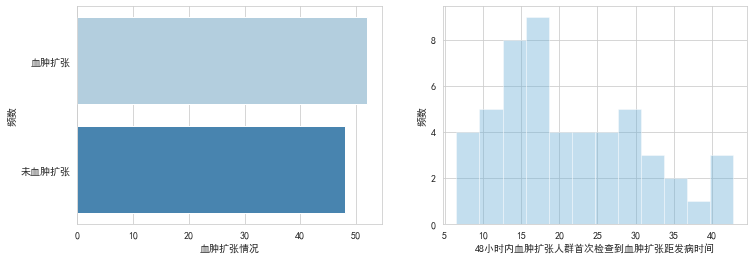

In [121]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
sns.barplot(x = res_df_is_HM['ID'], y = res_df_is_HM['is_HM_enlarge'], palette = sns.color_palette("Blues", 2))
plt.xlabel('血肿扩张情况')
plt.ylabel('频数')
plt.subplot(122)
sns.distplot(res_df[res_df['is_HM_enlarge'] == 1]['HM_enlarge_time'], kde = False, bins = 12, color = sns.color_palette("Blues", 1))
plt.xlabel('48小时内血肿扩张人群首次检查到血肿扩张距发病时间')
plt.ylabel('频数')
plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\血肿扩张情况.png", bbox_inches = 'tight', dpi=600)
plt.show()

In [122]:
## 将血肿扩张信息与患者信息连接一下
res_df_visual = res_df.copy()
b1_data = pd.read_excel(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\表1-患者列表及临床信息.xlsx', dtype = str)
res_df_visual = pd.merge(left = res_df_visual, right = b1_data, left_on = 'ID', right_on = 'Unnamed: 0', how = 'left')
res_df_visual['年龄'] = [int(x) for x in res_df_visual['年龄']]
res_df_visual

,ID,HM_enlarge_time,is_HM_enlarge,Unnamed: 0,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,...,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,8.268333,1.0,sub001,4,训练,20161212002136,43,女,0,...,0,2.5,180/90,0,1,1,1,1,1,1
1,sub002,14.923333,1.0,sub002,0,训练,20160406002131,58,男,0,...,0,3,199/120,0,1,1,1,0,1,1
2,sub003,9.522500,1.0,sub003,5,训练,20160413000006,78,男,0,...,0,2,199/120,0,1,1,1,1,1,1
3,sub004,0.000000,0.0,sub004,4,训练,20161215001667,70,男,2,...,0,1,186/99,0,1,1,1,0,0,0
4,sub005,26.467500,1.0,sub005,3,训练,20161222000978,51,男,0,...,0,5,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,0.000000,0.0,sub096,4,训练,20180802001789,93,女,0,...,0,1,181/76,0,0,0,1,1,1,1
96,sub097,31.925556,1.0,sub097,2,训练,20181010000767,83,女,0,...,0,3,170/79,0,1,1,1,1,1,1
97,sub098,42.756667,1.0,sub098,5,训练,20180612002507,82,男,0,...,0,2.5,200/100,0,1,1,1,1,1,1
98,sub099,17.672778,1.0,sub099,3,训练,20180620002296,53,男,0,...,0,3,159/91,1,1,1,1,1,1,1


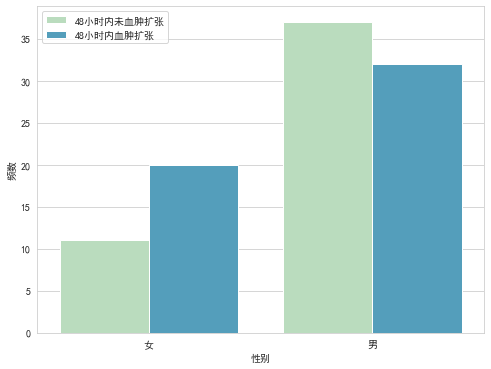

In [123]:
plt.figure(figsize=(8, 6))

sns.countplot(x = '性别', data = res_df_visual, hue = 'is_HM_enlarge', palette='GnBu')
plt.legend(labels = ['48小时内未血肿扩张', '48小时内血肿扩张'])
plt.ylabel('频数')

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\血肿扩张情况_性别.png", bbox_inches = 'tight', dpi = 600)
plt.show()

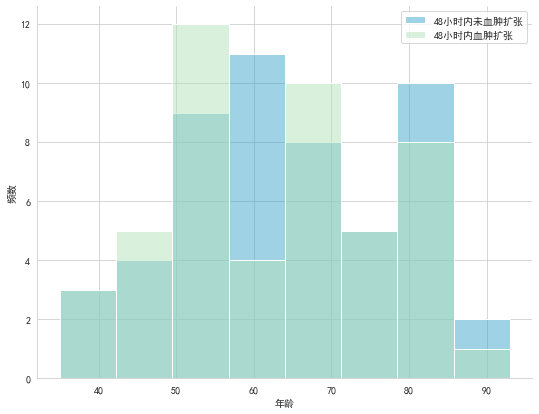

In [124]:
# sns.set_context({'figure.figsize':[8, 6]})

ax = sns.displot(data = res_df_visual, x = '年龄', hue = 'is_HM_enlarge', palette='GnBu', legend = False)
ax.figure.set_size_inches(8,6)
plt.legend(labels = ['48小时内未血肿扩张', '48小时内血肿扩张'])
plt.ylabel('频数')

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\血肿扩张情况_年龄.png", bbox_inches = 'tight', dpi = 600)
plt.show()

In [125]:
res_df_visual.columns

Index(['ID', 'HM_enlarge_time', 'is_HM_enlarge', 'Unnamed: 0', '90天mRS',
       '数据集划分', '入院首次影像检查流水号', '年龄', '性别', '脑出血前mRS评分', '高血压病史', '卒中病史',
       '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '发病到首次影像检查时间间隔', '血压', '脑室引流',
       '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经'],
      dtype='object')

7it [00:00, 27.35it/s]


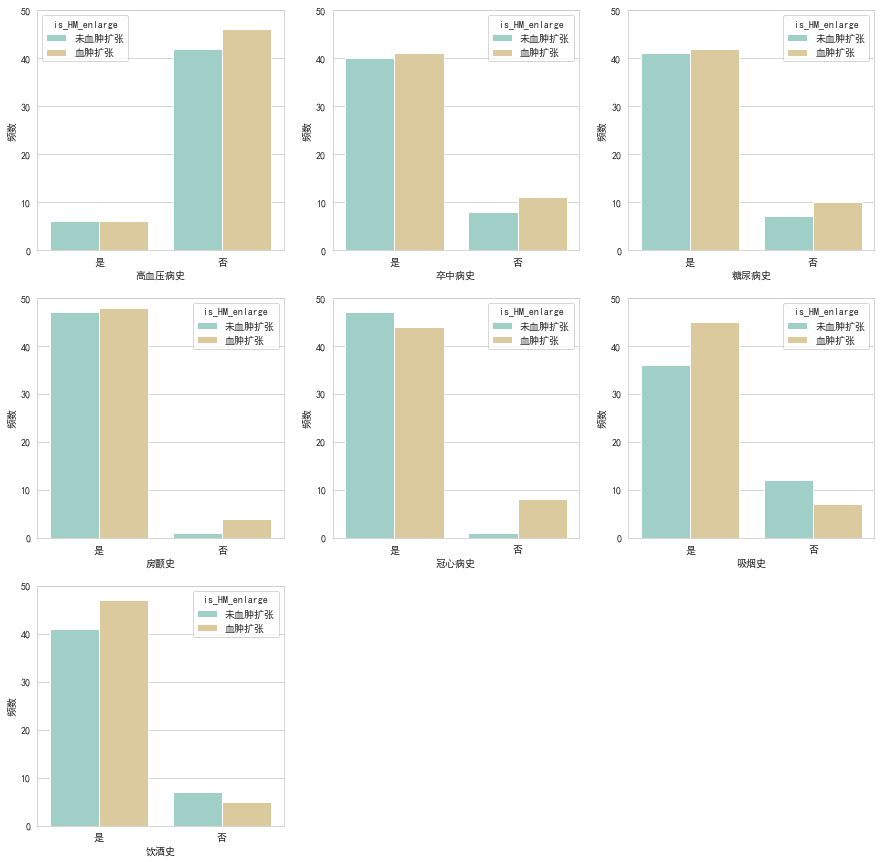

In [126]:
dis_his = ['高血压病史', '卒中病史','糖尿病史', 
            '房颤史', '冠心病史', '吸烟史', '饮酒史']
plt.figure(figsize = (15, 15))
for i, i_dis in tqdm(enumerate(dis_his)):
    tmp_df = res_df_visual.groupby(['is_HM_enlarge', i_dis]).count()
    tmp_df['is_HM_enlarge', i_dis] = tmp_df.index.to_numpy()
    tmp_df['is_HM_enlarge'] = tmp_df['is_HM_enlarge', i_dis].apply(lambda x: x[0])
    tmp_df[i_dis] = tmp_df['is_HM_enlarge', i_dis].apply(lambda x: x[1])
    tmp_df = tmp_df[['is_HM_enlarge', i_dis, 'ID']]
    tmp_df['is_HM_enlarge'] = tmp_df['is_HM_enlarge'].apply(lambda x: '未血肿扩张' if x == 0 else '血肿扩张')
    tmp_df[i_dis] = tmp_df[i_dis].apply(lambda x: '是' if x == '0' else '否')
    
    plt.subplot(3, 3, i + 1)
    sns.barplot(data = tmp_df, x = i_dis, y = 'ID', hue = 'is_HM_enlarge', palette='BrBG_r', )
    plt.ylim(0, 50)
    plt.ylabel('频数')
    # plt.legend(['未血肿扩张', '血肿扩张'])

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\血肿扩张情况_病史.png", bbox_inches = 'tight', dpi = 600)
plt.show()

7it [00:00, 12.76it/s]


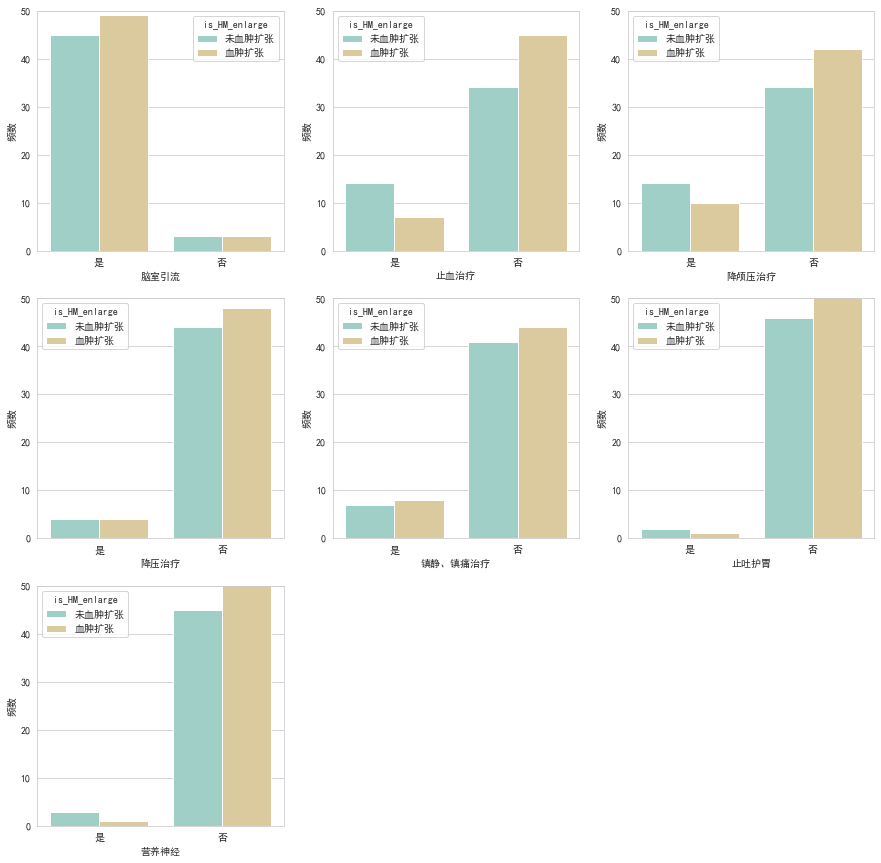

In [127]:
treatment = ['脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']
plt.figure(figsize = (15, 15))
for i, i_tre in tqdm(enumerate(treatment)):
    tmp_df = res_df_visual.groupby(['is_HM_enlarge', i_tre]).count()
    tmp_df['is_HM_enlarge', i_tre] = tmp_df.index.to_numpy()
    tmp_df['is_HM_enlarge'] = tmp_df['is_HM_enlarge', i_tre].apply(lambda x: x[0])
    tmp_df[i_tre] = tmp_df['is_HM_enlarge', i_tre].apply(lambda x: x[1])
    tmp_df = tmp_df[['is_HM_enlarge', i_tre, 'ID']]
    tmp_df['is_HM_enlarge'] = tmp_df['is_HM_enlarge'].apply(lambda x: '未血肿扩张' if x == 0 else '血肿扩张')
    tmp_df[i_tre] = tmp_df[i_tre].apply(lambda x: '是' if x == '0' else '否')
    
    plt.subplot(3, 3, i + 1)
    sns.barplot(data = tmp_df, x = i_tre, y = 'ID', hue = 'is_HM_enlarge', palette='BrBG_r', )
    plt.ylim(0, 50)
    plt.ylabel('频数')
    # plt.legend(['未血肿扩张', '血肿扩张'])

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\血肿扩张情况_治疗.png", bbox_inches = 'tight', dpi = 600)
plt.show()